In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
file_path = 'D:/AIML_PROJECT/DistrictwiseSLLCrimes.csv'
data = pd.read_csv(file_path)
data.head()

,id,year,state_name,state_code,district_name,district_code,registeration_circles,crime_against_women_total,protection_of_children_from_sexual_offences,juvenile_justice_care_and_protection_of_children,...,ndps_total,forest_act_1927_and_the_forest_conservation,cigarette_and_other_tobacco_products,foreigner_and_passport_related_total,food_drugs_and_essential_commodities_total,gambling,electricity,motor_vehicle,other_sll_crimes,total_cognizable_sll_crimes
0,0,01-01-2021,Andhra Pradesh,28,Ananthapuramu,502,Anantapur,0,1.0,1,...,31,0,5.0,0.0,76,267,0.0,0.0,0.0,5930.0
1,1,01-01-2021,Andhra Pradesh,28,Chittoor,503,Chittoor,4,77.0,0,...,42,0,0.0,0.0,83,454,0.0,0.0,3.0,2853.0
2,2,01-01-2021,Andhra Pradesh,28,Y.S.R.,504,Cuddapah,8,7.0,1,...,36,0,32.0,0.0,75,1379,0.0,37.0,13.0,2314.0
3,3,01-01-2021,Andhra Pradesh,28,East Godavari,505,East Godavari,14,32.0,0,...,139,0,68.0,0.0,31,1499,0.0,0.0,674.0,4254.0
4,4,01-01-2021,Andhra Pradesh,28,Ananthapuramu,502,Guntakal Railway,0,0.0,0,...,3,0,0.0,0.0,0,0,0.0,0.0,0.0,47.0


C:\Users\ishaj\AppData\Local\Temp\ipykernel_32904\1332479851.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rajasthan_data.fillna(0, inplace=True)
C:\Users\ishaj\AppData\Local\Temp\ipykernel_32904\1332479851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rajasthan_data['total_cognizable_sll_crimes'] = pd.to_numeric(rajasthan_data['total_cognizable_sll_crimes'], errors='coerce')
C:\Users\ishaj\AppData\Local\Temp\ipykernel_32904\1332479851.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

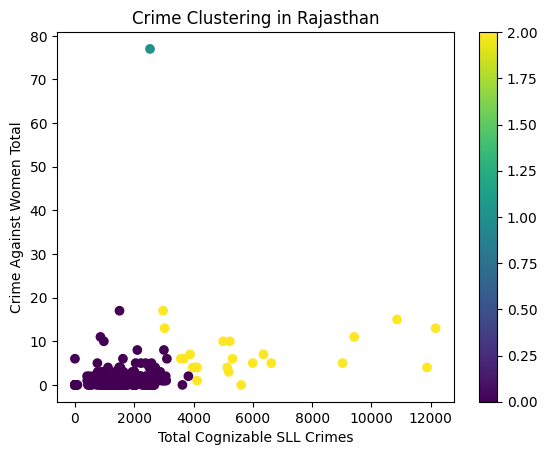

In [2]:
# Filter data for Rajasthan and Bharatpur district
rajasthan_data = data[data['state_name'] == 'Rajasthan']
bharatpur_data = rajasthan_data[rajasthan_data['district_name'] == 'Bharatpur']

# Handling missing values if any
rajasthan_data.fillna(0, inplace=True)

# Converting necessary columns to numeric for clustering
rajasthan_data['total_cognizable_sll_crimes'] = pd.to_numeric(rajasthan_data['total_cognizable_sll_crimes'], errors='coerce')
rajasthan_data['crime_against_women_total'] = pd.to_numeric(rajasthan_data['crime_against_women_total'], errors='coerce')

# Perform feature scaling
scaler = StandardScaler()
rajasthan_data_scaled = scaler.fit_transform(rajasthan_data[['total_cognizable_sll_crimes', 'crime_against_women_total']])

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rajasthan_data['cluster'] = kmeans.fit_predict(rajasthan_data_scaled)

# Visualize the clustering
plt.scatter(rajasthan_data['total_cognizable_sll_crimes'], rajasthan_data['crime_against_women_total'], c=rajasthan_data['cluster'], cmap='viridis')
plt.title('Crime Clustering in Rajasthan')
plt.xlabel('Total Cognizable SLL Crimes')
plt.ylabel('Crime Against Women Total')
plt.colorbar()
plt.show()

In [3]:
# Prepare data for prediction (Random Forest Regressor)
X = bharatpur_data[['total_cognizable_sll_crimes', 'crime_against_women_total']]
y = bharatpur_data['total_cognizable_sll_crimes']  # Target variable: Future crime predictions

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediction example
def predict_crime(crime_against_women_total):
    crime_input = scaler.transform([[crime_against_women_total, crime_against_women_total]])
    return rf.predict(crime_input)[0]

# Test with sample data
sample_prediction = predict_crime(500)  # Example input
print(f'Predicted crime number: {sample_prediction}')

Predicted crime number: 2843.04


C:\Users\ishaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ishaj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
